## Plot the results of IrrigatedWIT

Enter the name of the polygon of interest and a stack plot is produced

## User Inputs

In [79]:
# Enter the Name of the polygon you want to check:
# i.e., the 'UniqueID' column in the shapefile
polyName = 'CONDAMINE-CULGOA_2013_510'

In [80]:
# Where are the .csv files stored?
# (shouldn't need to change this)
filepath = "results/irrigatedWIT/CONDAMINE-CULGOA/2013/csvs/"

# do you want to export the plot?
export_plot = True

# If so, where?
Output_dir = 'results/irrigatedWIT/CONDAMINE-CULGOA/2013/plots/'

### Run the cells below to produce a stack plot of the polygon

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [81]:
#import the csv and prepare dataframe
df = pd.read_csv(filepath + polyName + ".csv")
df['Datetime'] = pd.to_datetime(df.Datetime)
df['Datetime'] = df.Datetime.dt.normalize()
df = df.set_index('Datetime')

<Figure size 432x288 with 0 Axes>

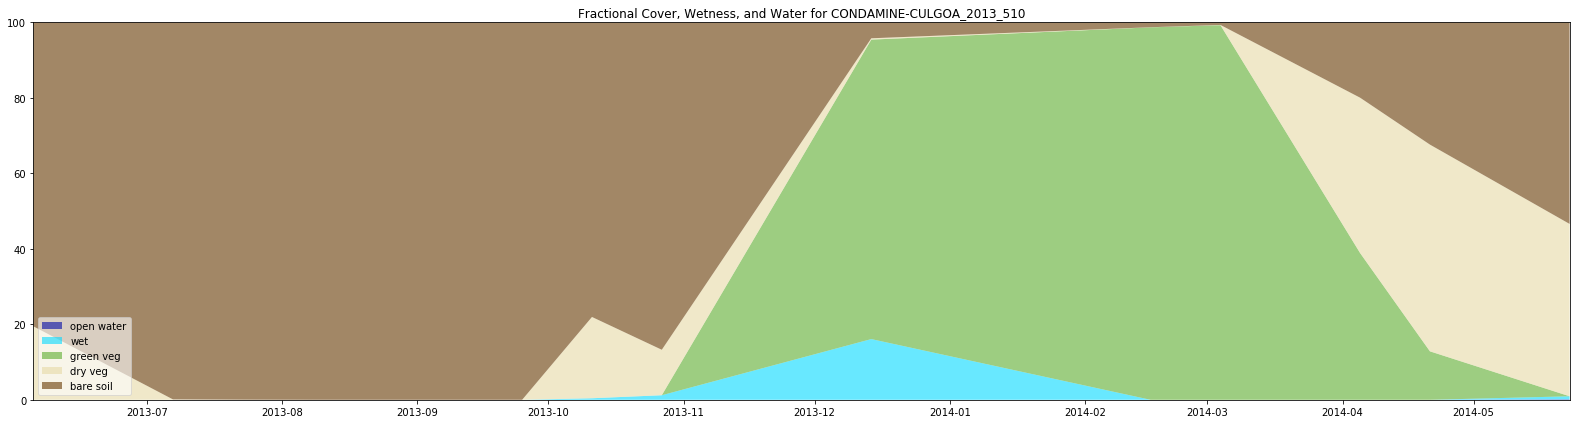

In [82]:
# generate plot
warnings.filterwarnings("ignore")
#set up color palette
pal = [sns.xkcd_rgb["cobalt blue"],
       sns.xkcd_rgb["neon blue"],
       sns.xkcd_rgb["grass"],
       sns.xkcd_rgb["beige"],
       sns.xkcd_rgb["brown"]]       

#make a stacked area plot
plt.clf()
fig= plt.figure(figsize = (22,6))
plt.stackplot(df.index, 
              df.wofs_area_percent, 
              df.wet_percent, 
              df.green_veg_percent, 
              df.dry_veg_percent,
              df.bare_soil_percent,
              labels=['open water',
                      'wet',
                      'green veg',
                      'dry veg',
                      'bare soil',
                     ], colors=pal, alpha = 0.6)

#set axis limits to the min and max
plt.axis(xmin = df.index[0], xmax = df.index[-1], ymin = 0, ymax = 100)

#add a legend and a tight plot box
plt.legend(loc='lower left', framealpha=0.6)
plt.title('Fractional Cover, Wetness, and Water for '+polyName)
plt.tight_layout()
if export_plot:
    #save the figure
    plt.savefig(f'{Output_dir}{polyName}.png')#, transparent=True)
